In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/Darsh/Desktop/Datasets/googleplaystore.csv",engine="python")

In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
df.shape

(8886, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Q1. Find category having maximum number of apps, use a bar chart to prove your finding.

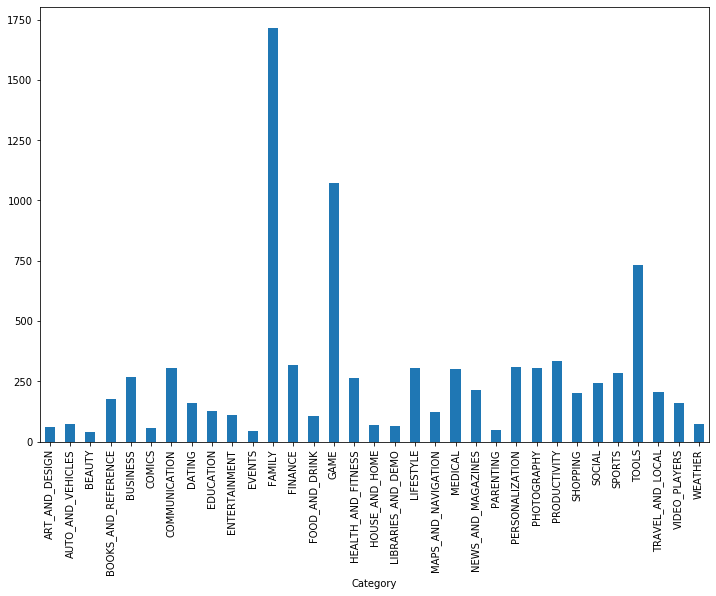

In [6]:
groups=df.groupby("Category").size()
groups.plot.bar(figsize=(12,8))
# From figure, Family is the most installed category

# Q4 Find put the most installed category

In [7]:
df.Installs.unique()
df.Installs=df.Installs.str.replace(",","")
df.Installs=df.Installs.str.replace("+","")

In [8]:
df.Installs=df.Installs.astype("float64") #It is required because we cannot perform sum() operation on strings.

In [9]:
y=df.groupby("Category")["Installs"].sum()
z=pd.DataFrame(y)


In [10]:
z.sort_values(by=["Installs"],ascending=False).head(1)
# The GAME category has highest number of installs amongst all.

,Installs
Category,
GAME,3.154386e+10


# Q5. How do the app ratings differ between paid and free apps in general?

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite ?Çô FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
q=df.groupby('Type')["Rating"].sum()

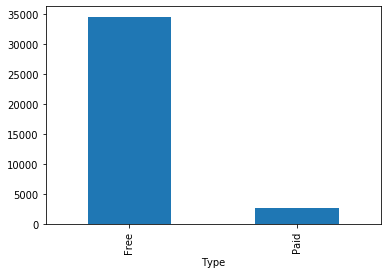

In [13]:
q.plot.bar()
#From figure we can clearly see that Free apps have much higher rating than paid apps

# Q2. Find top 5 largest apps in given dataset having installs greater than 1 million.

In [14]:
df.Size=df.Size.str.replace("M","000") #Changed the size from mb to kb.
df.Size=df.Size.str.replace("K","")
df.Size=df.Size.str.replace("k","")
df.Size=df.Size.str.replace("Varies with device","0")

In [15]:
df.Size=df.Size.astype("float64")
df.drop_duplicates(subset="App",keep="first",inplace=True)

In [16]:
df1=df.sort_values(by=["Size"],ascending=False)

In [17]:
df1=df1[df1.Installs > 1000000]

In [18]:
df1.head(5)
# This gives us the list of top 5 apps having largest size and installs greater than 1 million.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5427,Ultimate Tennis,SPORTS,4.3,183004,100000.0,10000000.0,Free,0,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000.0,5000000.0,Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000.0,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
5862,Miami crime simulator,GAME,4.0,254518,100000.0,10000000.0,Free,0,Mature 17+,Action,"July 9, 2018",2,4.0 and up
7404,SimCity BuildIt,FAMILY,4.5,4218587,100000.0,50000000.0,Free,0,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up


# Q3. Find out popular app which is updated before 2016. Popularity is  based on number of installs

In [19]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"]) # To convert str type date into datetime format.

In [20]:
df2=df[df["Last Updated"] < "2016-01-01"]

In [21]:
df2.sort_values(by=["Installs"],ascending=False).head(1)
# The Smash Hit app is the app having highest number of installs and it is updated before 2016.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4059,Smash Hit,GAME,4.5,4147718,79000.0,100000000.0,Free,0,Everyone,Arcade,2015-11-26,1.4.0,2.3 and up
